In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("cleaning_data.csv")
data=data.drop("Unnamed: 0",axis=1)
data.head()

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice,ExterQual_TA,BsmtQual_Ex,KitchenQual_Ex,KitchenQual_TA,ExterQual_Ex,BsmtQual_TA
0,7,2003,2003,856.0,856.0,1710.0,2,8.0,2.0,548.0,208500.0,0,0,0,0,0,0
1,6,1976,1976,1262.0,1262.0,1262.0,2,6.0,2.0,460.0,181500.0,1,0,0,1,0,0
2,7,2001,2002,920.0,920.0,1786.0,2,6.0,2.0,608.0,223500.0,0,0,0,0,0,0
3,7,1915,1970,756.0,961.0,1717.0,1,7.0,3.0,642.0,140000.0,1,0,0,0,0,1
4,8,2000,2000,1145.0,1145.0,2198.0,2,9.0,3.0,836.0,250000.0,0,0,0,0,0,0


* **I examined the correlation values between the variables**

In [3]:
data_2=data[["OverallQual","YearBuilt","TotalBsmtSF","1stFlrSF","GrLivArea","FullBath","TotRmsAbvGrd","GarageCars","GarageArea","SalePrice"]]
data_2.corr()

,OverallQual,YearBuilt,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice
OverallQual,1.000000,0.572323,0.541357,0.473842,0.597066,0.550600,0.436571,0.605527,0.568557,0.816856
YearBuilt,0.572323,1.000000,0.409571,0.287776,0.212840,0.468271,0.105147,0.542351,0.486953,0.568918
TotalBsmtSF,0.541357,0.409571,1.000000,0.807158,0.404365,0.331598,0.271000,0.460029,0.485659,0.645251
1stFlrSF,0.473842,0.287776,0.807158,1.000000,0.526720,0.383460,0.401272,0.458349,0.487426,0.621873
GrLivArea,0.597066,0.212840,0.404365,0.526720,1.000000,0.641861,0.835192,0.487063,0.471376,0.729311
FullBath,0.550600,0.468271,0.331598,0.383460,0.641861,1.000000,0.556469,0.473248,0.414909,0.583994
TotRmsAbvGrd,0.436571,0.105147,0.271000,0.401272,0.835192,0.556469,1.000000,0.372263,0.339544,0.539339
GarageCars,0.605527,0.542351,0.460029,0.458349,0.487063,0.473248,0.372263,1.000000,0.894560,0.675896
GarageArea,0.568557,0.486953,0.485659,0.487426,0.471376,0.414909,0.339544,0.894560,1.000000,0.660029
SalePrice,0.816856,0.568918,0.645251,0.621873,0.729311,0.583994,0.539339,0.675896,0.660029,1.000000


* **I visualized the relationship between variables with a heatmap**

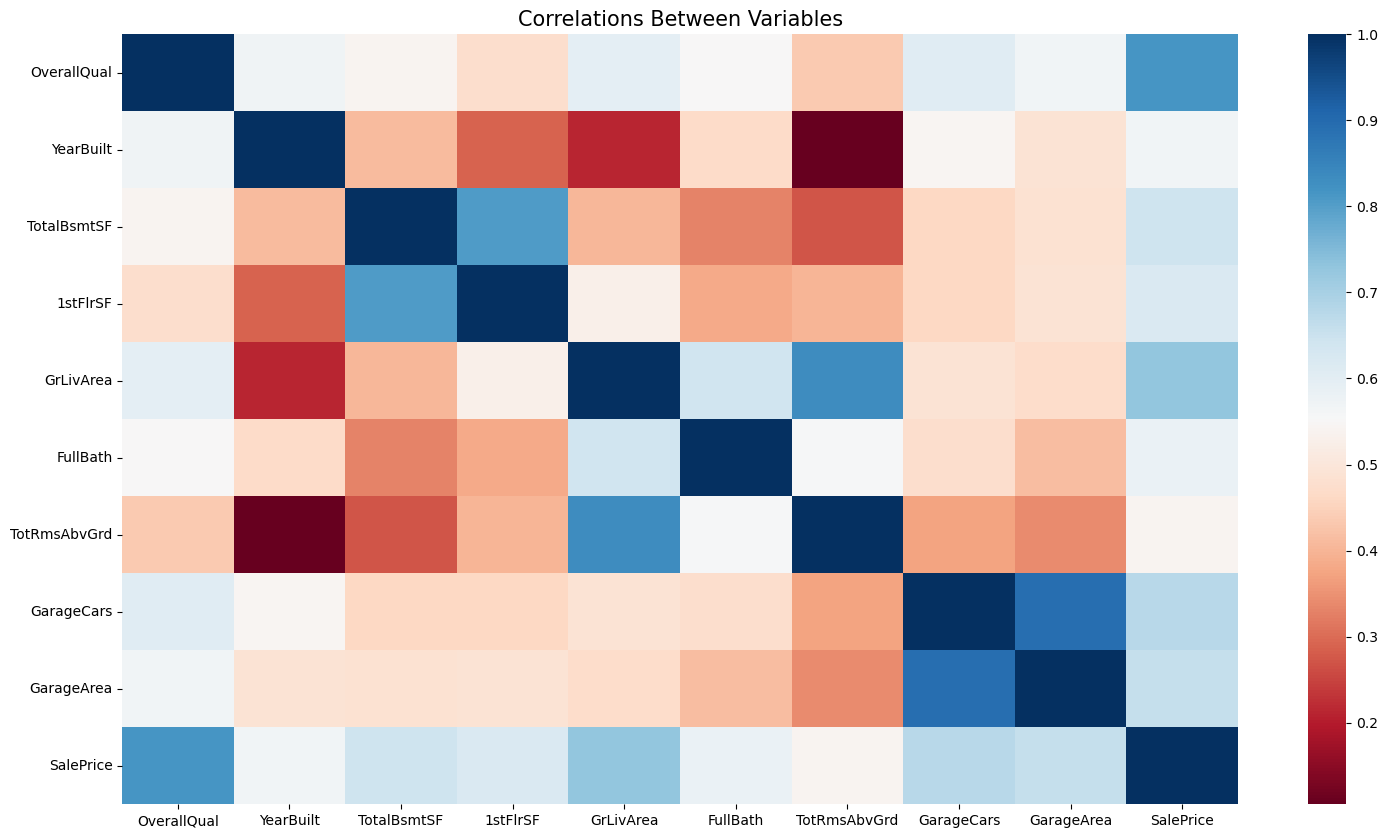

In [4]:
plt.figure(figsize=(18,10))
sns.heatmap(data_2.corr(), cmap="RdBu")
plt.title("Correlations Between Variables", size=15)
plt.show()

* **I used boxplot to examine the price variation based on the overall material and build quality in the house**

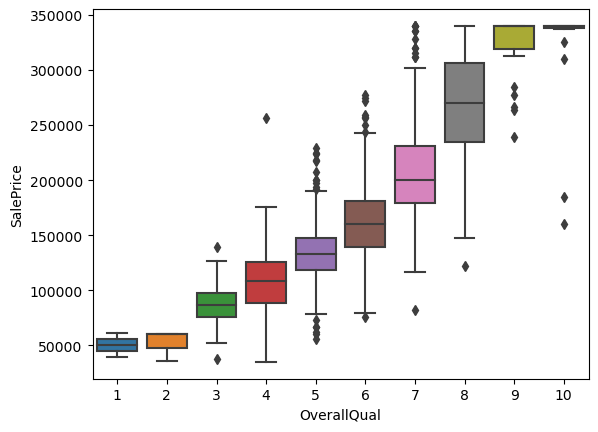

In [5]:
sns.boxplot(data,x="OverallQual",y="SalePrice")
plt.show()

* **I created a column called "Century" to examine house prices and the distribution of these prices between centuries.**

In [6]:

def year_grouping(year):
    if(year>1800 and year<1900):
        return "19th century"
    elif(year>=1900 and year<2000):
        return "20th century"
    elif(year>=2000 and year<2023):
        return "21st century"
data["Century"]=data["YearBuilt"].apply(year_grouping)
data.head()

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice,ExterQual_TA,BsmtQual_Ex,KitchenQual_Ex,KitchenQual_TA,ExterQual_Ex,BsmtQual_TA,Century
0,7,2003,2003,856.0,856.0,1710.0,2,8.0,2.0,548.0,208500.0,0,0,0,0,0,0,21st century
1,6,1976,1976,1262.0,1262.0,1262.0,2,6.0,2.0,460.0,181500.0,1,0,0,1,0,0,20th century
2,7,2001,2002,920.0,920.0,1786.0,2,6.0,2.0,608.0,223500.0,0,0,0,0,0,0,21st century
3,7,1915,1970,756.0,961.0,1717.0,1,7.0,3.0,642.0,140000.0,1,0,0,0,0,1,20th century
4,8,2000,2000,1145.0,1145.0,2198.0,2,9.0,3.0,836.0,250000.0,0,0,0,0,0,0,21st century


* **House prices have gradually increased as expected, but the price distribution of 19th-century houses is very wide**
* **20th-century  why is the price range of houses narrower?**

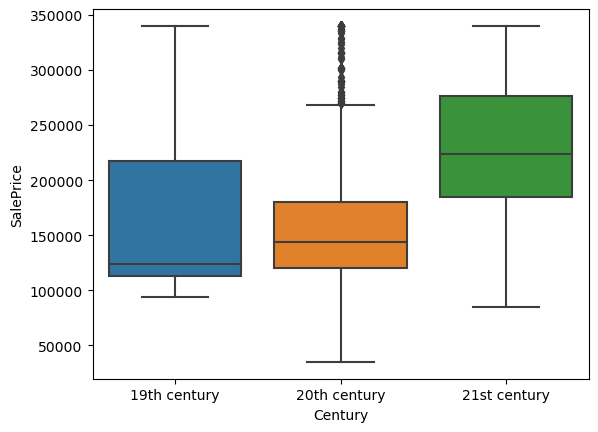

In [7]:
sns.boxplot(data,x="Century",y="SalePrice",order=["19th century","20th century","21st century"])
plt.show()

* **I wanted to examine the changes in house prices over the years by listing them.**
* **However, I couldn't see the regular increase I wanted**
* **Even from this graph, it can be said that housing prices have decreased over the years.**
* **but before coming to such an idea, we need to research the characteristics of the period, maybe there has been a change in currency**
* **or the price is too high because it is an important old building**

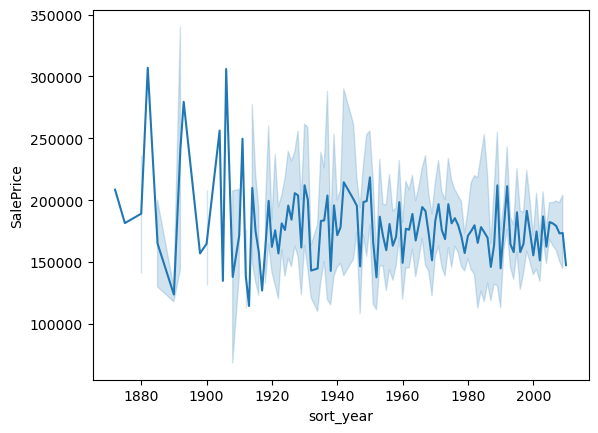

In [8]:
data["sort_year"]=np.sort(data["YearBuilt"])
sns.lineplot(data,x="sort_year",y="SalePrice")
plt.show()

* **I combined categorical variables into a single column**

In [9]:
def building_new_columns(name):
    data[name]=np.where(data[name+"_TA"]==1 ,"TA",
                         np.where(data[name+"_Ex"]==1 , "Ex" , "Other"))
    return data[name]

data["ExterQual"]=building_new_columns("ExterQual")
data["BsmtQual"]=building_new_columns("BsmtQual")
data["KitchenQual"]=building_new_columns("KitchenQual")
data.sample(10)

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,...,BsmtQual_Ex,KitchenQual_Ex,KitchenQual_TA,ExterQual_Ex,BsmtQual_TA,Century,sort_year,ExterQual,BsmtQual,KitchenQual
222,6,1975,1975,713.0,811.0,1552.000,2,6.0,2.0,434.00,...,0,0,1,0,0,20th century,1937,TA,Other,TA
810,6,1974,1999,1040.0,1309.0,1309.000,1,5.0,2.0,484.00,...,0,0,0,0,1,20th century,1977,TA,TA,Other
1142,8,2006,2007,1466.0,1466.0,2747.625,3,10.0,3.0,938.25,...,1,0,0,0,0,21st century,2003,Other,Ex,Other
542,7,1998,1999,1650.0,1680.0,1680.000,2,7.0,2.0,583.00,...,1,0,0,0,0,20th century,1963,Other,Ex,Other
421,6,1977,2000,1602.0,1602.0,1602.000,2,8.0,2.0,529.00,...,0,0,0,0,0,20th century,1957,Other,Other,Other
1075,7,1940,1984,800.0,960.0,1740.000,1,6.0,1.0,240.00,...,0,0,1,0,1,20th century,2000,TA,TA,TA
753,8,2005,2005,1030.0,1038.0,2098.000,2,8.0,3.0,878.00,...,0,1,0,0,0,21st century,1975,Other,Other,Ex
1292,5,1892,1965,994.0,1378.0,2372.000,2,10.0,1.0,432.00,...,0,0,1,0,1,19th century,2005,TA,TA,TA
1405,8,2004,2005,1594.0,1646.0,1646.000,2,5.0,2.0,482.00,...,1,0,0,0,0,21st century,2007,Other,Ex,Other
263,5,1929,2001,926.0,926.0,1316.000,1,6.0,2.0,484.00,...,0,0,1,0,1,20th century,1941,TA,TA,TA


* **I checked if my method is working correctly**

In [10]:
data.isnull().sum()

OverallQual       0
YearBuilt         0
YearRemodAdd      0
TotalBsmtSF       0
1stFlrSF          0
GrLivArea         0
FullBath          0
TotRmsAbvGrd      0
GarageCars        0
GarageArea        0
SalePrice         0
ExterQual_TA      0
BsmtQual_Ex       0
KitchenQual_Ex    0
KitchenQual_TA    0
ExterQual_Ex      0
BsmtQual_TA       0
Century           0
sort_year         0
ExterQual         0
BsmtQual          0
KitchenQual       0
dtype: int64

* **I used boxplot to compare the prices of these quality metrics**

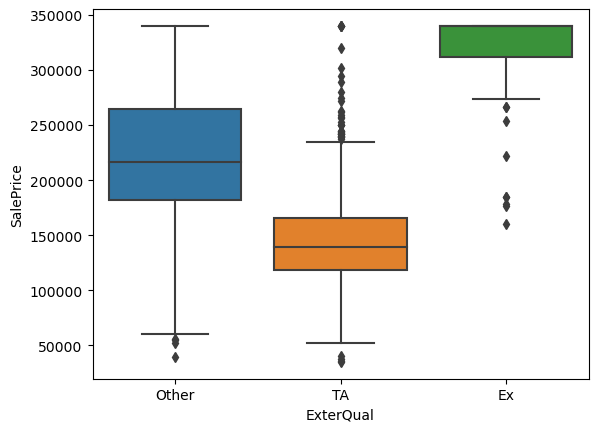

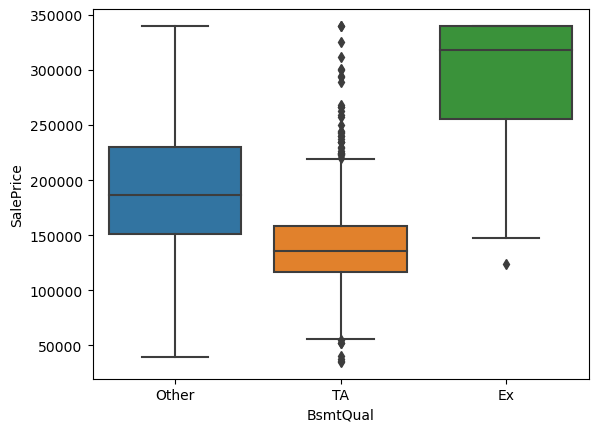

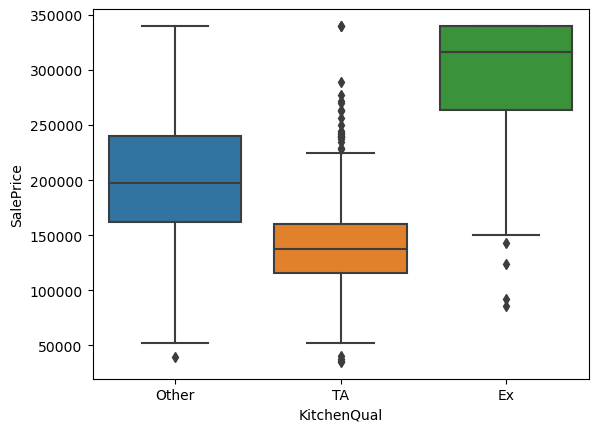

In [11]:
sns.boxplot(data,x="ExterQual",y="SalePrice")
plt.show()
sns.boxplot(data,x="BsmtQual",y="SalePrice")
plt.show()
sns.boxplot(data,x="KitchenQual",y="SalePrice")
plt.show()

* **It can be said that in general, the preferences are concentrated on TA type quality.**

In [12]:
print(data["ExterQual"].value_counts())
print(data["BsmtQual"].value_counts())
print(data["KitchenQual"].value_counts())

TA       906
Other    502
Ex        52
Name: ExterQual, dtype: int64
Other    690
TA       649
Ex       121
Name: BsmtQual, dtype: int64
TA       735
Other    625
Ex       100
Name: KitchenQual, dtype: int64


In [13]:
data["remod_diff"] = data["YearRemodAdd"] - data["YearBuilt"]
(data.groupby(["remod_diff"])["SalePrice"].mean())

remod_diff
0      180103.352094
1      234777.500000
2      157042.857143
3      117000.000000
4      124850.000000
           ...      
111    124000.000000
115    122000.000000
121     94000.000000
122    295000.000000
123    265979.000000
Name: SalePrice, Length: 109, dtype: float64

* **I drew a lineplot to examine the change between the year of renovation and the price**

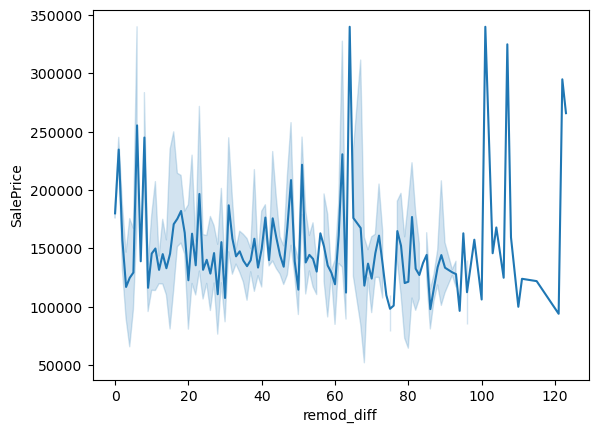

In [14]:
sns.lineplot(data,x="remod_diff",y="SalePrice")
plt.show()